In [2]:
# ran .venv/bin/pip install -e ".[notebook]" in terminial
from mechanism import *
import numpy as np

%matplotlib ipympl 
import matplotlib.pyplot as plt

In [3]:
# Joint.follow_all = True  # You can trace the path of all joints by uncommenting this

O, A, B, C, D = get_joints('O A B C D')
D.follow = True
B.follow = True

In [4]:
a = Vector((O, A), r=5)
# b = Vector((O, C), r=8, theta=np.deg2rad(90), style='ground')  # Use this vector for a cusp output
b = Vector((O, C), r=8, theta=0, style='ground')
c = Vector((A, B), r=8)
d = Vector((C, B), r=9)
e = Vector((A, D), r=4)
f = Vector((O, D), show=False)

In [5]:
def loops(x, inp):
    # Note: The way this is structured with the second loop equation is only appropriate for position analysis.
    temp = np.zeros((2, 2))
    temp[0] = a(inp) + c(x[0]) - d(x[1]) - b()
    temp[1] = a(inp) + e(x[0] + np.deg2rad(30)) - f(x[2], x[3])
    return temp.flatten()

In [6]:
t2 = np.linspace(0, 6*np.pi, 300)
guess = np.concatenate((np.deg2rad([50, 120]), np.array([5]), np.deg2rad([50])))
mechanism = Mechanism(vectors=(a, b, c, d, e, f), origin=O, pos=t2, guess=(guess, ),
                      loops=loops)

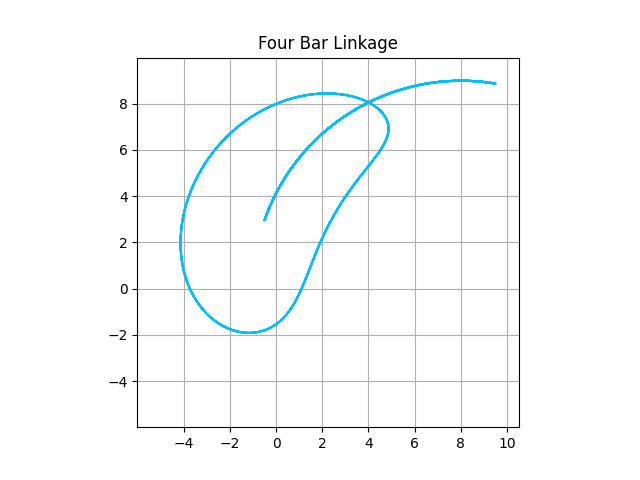

In [7]:
mechanism.iterate()
ani, fig, ax = mechanism.get_animation()

ax.set_title('Four Bar Linkage')

plt.show()